# Problem Definition: 
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns I will find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.


# Load Libraries

In [1]:
#load libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")
sns.set()

# Load Data

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
#load data
traindf=pd.read_csv('/kaggle/input/titanic/train.csv')
testdf=pd.read_csv('/kaggle/input/titanic/test.csv')
traindf.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data Statistics

In [4]:
#size of  data
print("train data size",len(traindf))
print("test data size",len(testdf))

train data size 891
test data size 418


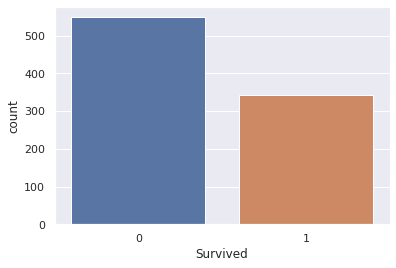

In [5]:
#plot the count of survived and non-survived classes 
sns.countplot(traindf["Survived"])

# Preprocessing

**Training data prerocessing**

In [6]:
#check null values in Age column in training data
print("null values in age feature:",traindf["Age"].isnull().any())
#check null values in Fare column in training data
print("null values in Fare feature:",traindf["Fare"].isnull().any())
#check null values values in Embarked column in training data
print("null values in Embarked feature:",traindf["Embarked"].isnull().any())
#check null values in Sex column in training data
print("null values in Sex feature:",traindf["Sex"].isnull().any())
#check null values in Parch column in training data
print("null values in Parch feature:",traindf["Parch"].isnull().any())
#check null values in SibSp column in training data
print("null values in SibSp feature:",traindf["SibSp"].isnull().any())
#check null values in Pclass column in training data
print("null values in Pclass feature:",traindf["Pclass"].isnull().any())

null values in age feature: True
null values in Fare feature: False
null values in Embarked feature: True
null values in Sex feature: False
null values in Parch feature: False
null values in SibSp feature: False
null values in Pclass feature: False


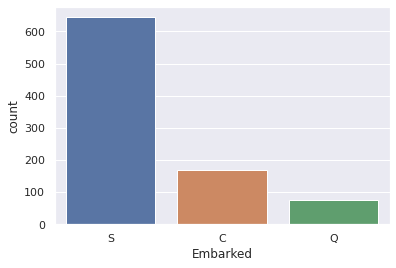

In [7]:
sns.countplot(traindf["Embarked"])

In [8]:
#handle null values in Age & Embarked Fields in training data
traindf["Age"] = traindf["Age"].fillna(traindf.Age.mean())
traindf["Embarked"] = traindf["Embarked"].fillna('S') # most common category
traindf.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


**Testing data preprocessing**

In [9]:
#check null values in Age column in testing data
print("null values in age feature:",testdf["Age"].isnull().any())
#check null values in Fare column in testing data
print("null values in Fare feature:",testdf["Fare"].isnull().any())
#check null values values in Embarked column in testing data
print("null values in Embarked feature:",testdf["Embarked"].isnull().any())
#check null values in Sex column in testing data
print("null values in Sex feature:",testdf["Sex"].isnull().any())
#check null values in Parch column in testing data
print("null values in Parch feature:",testdf["Parch"].isnull().any())
#check null values in SibSp column in testing data
print("null values in SibSp feature:",testdf["SibSp"].isnull().any())
#check null values in Pclass column in testing data
print("null values in Pclass feature:",testdf["Pclass"].isnull().any())

null values in age feature: True
null values in Fare feature: True
null values in Embarked feature: False
null values in Sex feature: False
null values in Parch feature: False
null values in SibSp feature: False
null values in Pclass feature: False


In [10]:
#handle null values in Age & Fare Fields
testdf["Age"] = testdf["Age"].fillna(testdf.Age.mean())
testdf["Fare"] = testdf["Fare"].fillna(testdf.Fare.mean())
testdf.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# Feature Extraction & Explanatory Analysis

**Categorical Features**

In [11]:
#view categorical data
def view_data(data):
    fig,axes = plt.subplots(2,3,figsize=(15,10))
    sns.countplot(data["Sex"],ax=axes[0][0])
    sns.countplot(data["Embarked"],ax=axes[0][1])
    sns.countplot(data["Pclass"],ax=axes[0][2])
    sns.countplot(data["SibSp"],ax=axes[1][0])
    sns.countplot(data["Parch"],ax=axes[1][1])
    plt.subplot(2,3,6)
    plt.axis("off")
    plt.show()

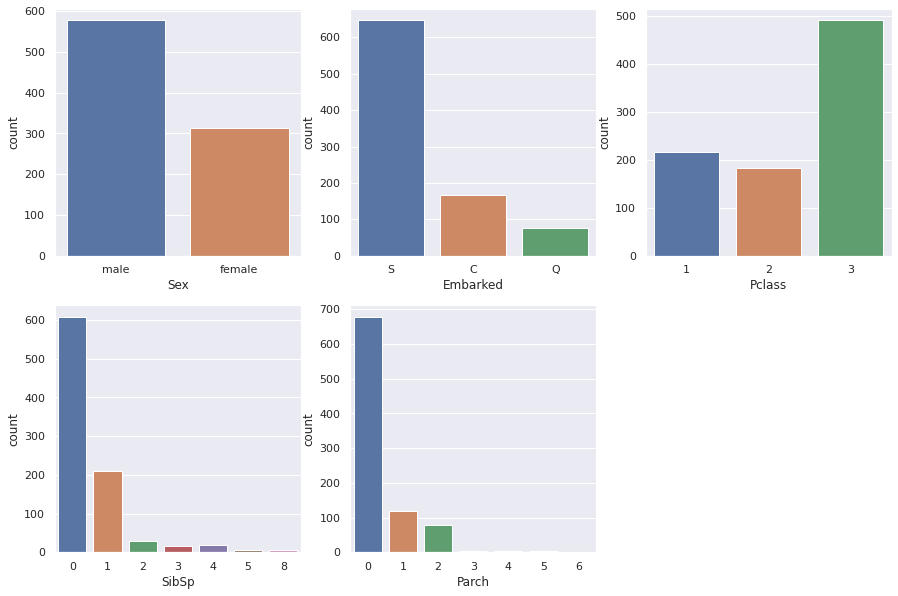

In [12]:
#view training categorical features
view_data(traindf)

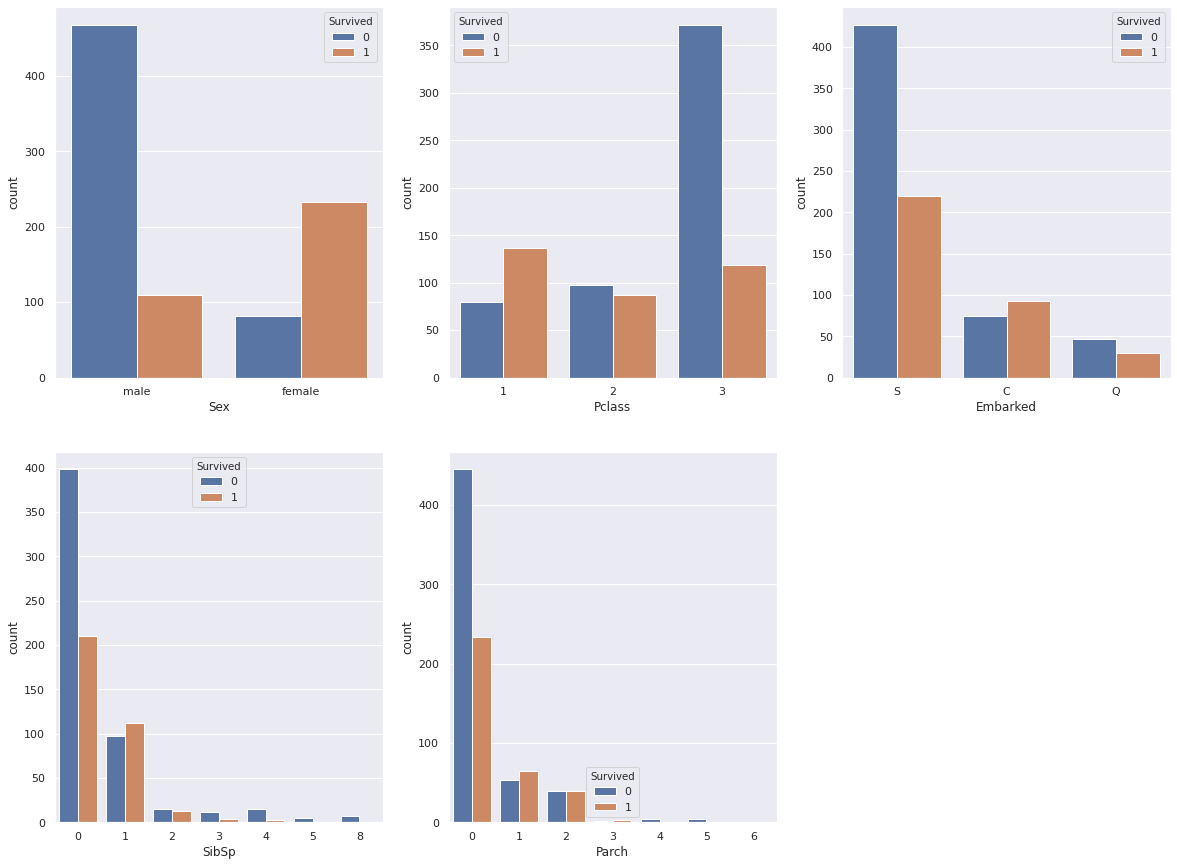

In [13]:
#View categorical features with respect to survived classes in the training data
fig,axes = plt.subplots(2,3,figsize=(20,15))
sns.countplot(x="Sex",hue="Survived",data=traindf, ax=axes[0][0])
sns.countplot(x="Pclass",hue="Survived",data=traindf, ax=axes[0][1])
sns.countplot(x="Embarked",hue="Survived",data=traindf, ax=axes[0][2])
sns.countplot(x="SibSp",hue="Survived",data=traindf, ax=axes[1][0])
sns.countplot(x="Parch",hue="Survived",data=traindf, ax=axes[1][1])
plt.subplot(2,3,6)
plt.axis("off")
plt.show()

In [14]:
#categorical features into numerical features for training data
traindf['Sex'] = traindf['Sex'].map({'male': 0, 'female': 1}).astype(int)
traindf['Embarked'] = traindf['Embarked'].map({'S': 1, 'C': 2,'Q':3}).astype(int)

traindf["SibSp"] = traindf["SibSp"].astype(int)
traindf["Parch"] = traindf["Parch"].astype(int)

traindf.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,1
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,3
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,2


**Testing Data**

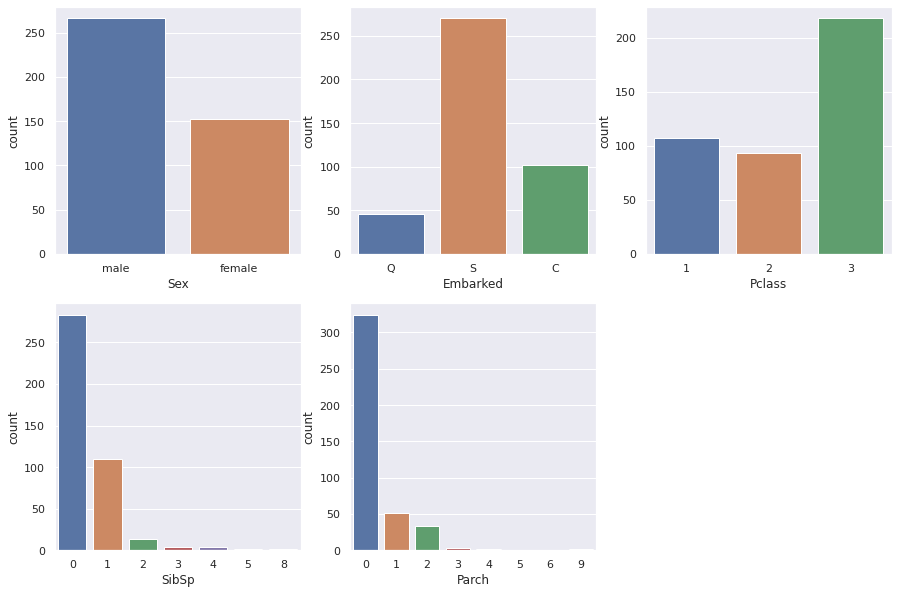

In [15]:
#view testing categorical features
view_data(testdf)

In [16]:
#categorical features into numerical features for testing data
testdf['Sex'] = testdf['Sex'].map({'male': 0, 'female': 1}).astype(int)
testdf['Embarked'] = testdf['Embarked'].map({'S': 1, 'C': 2,'Q':3}).astype(int)

testdf["SibSp"] = testdf["SibSp"].astype(int)
testdf["Parch"] = testdf["Parch"].astype(int)

testdf.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,1
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,3
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,2
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,1


**Numerical Features**

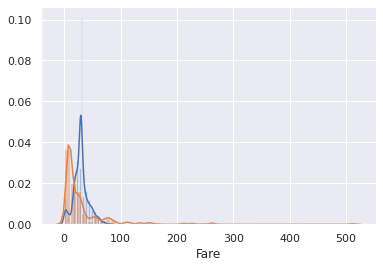

In [17]:
#show distribution of Age & Fare features from the training data
sns.distplot(traindf["Age"])
sns.distplot(traindf["Fare"])

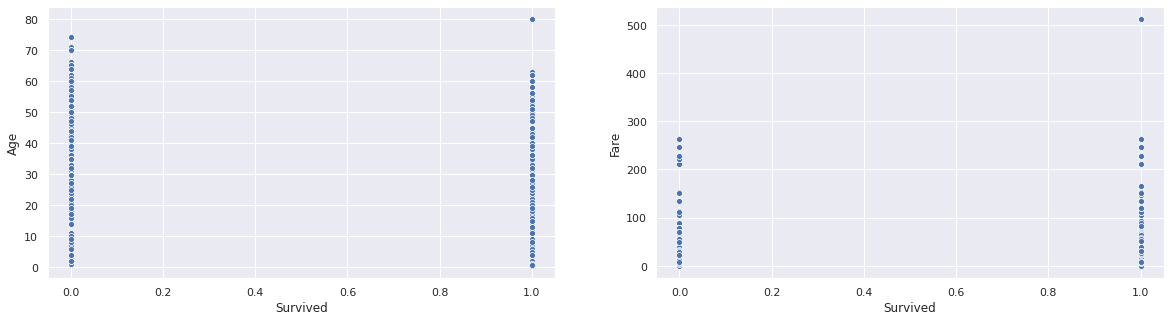

In [18]:
#plot Age and Fare features columns with respect to survived classification class
fig,axes = plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(x="Survived",y="Age",data=traindf,ax=axes[0])
sns.scatterplot(x="Survived",y="Fare",data=traindf,ax=axes[1])

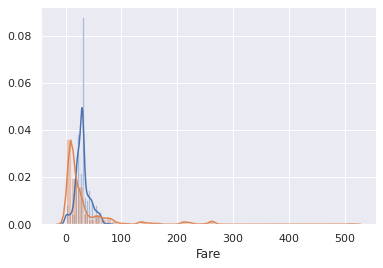

In [19]:
#show distribution of Age & Fare features from the testing data
sns.distplot(testdf["Age"])
sns.distplot(testdf["Fare"])

**Feature Analysis Conculsion**

From above graphs, it is noticed:
* According to sex feature, most male were not survived
* According to class feature, most of 3rd class were not survived
* According to embarked feature, most of people in surface were not survived

In [20]:
traindf=traindf[['Sex','Age','Pclass','Fare','Embarked','SibSp','Parch','Survived']]
traindf.head(10)

,Sex,Age,Pclass,Fare,Embarked,SibSp,Parch,Survived
0,0,22.000000,3,7.2500,1,1,0,0
1,1,38.000000,1,71.2833,2,1,0,1
2,1,26.000000,3,7.9250,1,0,0,1
3,1,35.000000,1,53.1000,1,1,0,1
4,0,35.000000,3,8.0500,1,0,0,0
5,0,29.699118,3,8.4583,3,0,0,0
6,0,54.000000,1,51.8625,1,0,0,0
7,0,2.000000,3,21.0750,1,3,1,0
8,1,27.000000,3,11.1333,1,0,2,1
9,1,14.000000,2,30.0708,2,1,0,1


# Feature selection

* The statistical relationship between two variables is referred to as their correlation.
* Positive: mean both variables move in the same direction, 
* Negative: mean that when one variable’s value increases, the other variables’ values decrease. 
* Neutral or zero: mean that the variables are unrelated.
* The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity. 

In [21]:
train_x = traindf[['Sex','Age','Pclass','Fare','Embarked','SibSp','Parch']]
train_x.corr()

,Sex,Age,Pclass,Fare,Embarked,SibSp,Parch
Sex,1.000000,-0.084153,-0.131900,0.182333,0.116569,0.114631,0.245489
Age,-0.084153,1.000000,-0.331339,0.091566,0.007461,-0.232625,-0.179191
Pclass,-0.131900,-0.331339,1.000000,-0.549500,0.045702,0.083081,0.018443
Fare,0.182333,0.091566,-0.549500,1.000000,0.062142,0.159651,0.216225
Embarked,0.116569,0.007461,0.045702,0.062142,1.000000,-0.059961,-0.078665
SibSp,0.114631,-0.232625,0.083081,0.159651,-0.059961,1.000000,0.414838
Parch,0.245489,-0.179191,0.018443,0.216225,-0.078665,0.414838,1.000000


* In statistical hypothesis testing, the p–value or probability value is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct. 

In [22]:
from sklearn.feature_selection import chi2,f_regression
scores,cpvalues = chi2(train_x,traindf["Survived"])

In [23]:
cpvalues.round(5)

array([0.     , 0.     , 0.     , 0.     , 0.08256, 0.10809, 0.00148])

In [24]:
#training features
train_x = traindf[['Sex','Age','Pclass','Embarked','SibSp']]

In [25]:
#testing features
test_x = testdf[['Sex','Age','Pclass','Embarked','SibSp']]
test_x

,Sex,Age,Pclass,Embarked,SibSp
0,0,34.50000,3,3,0
1,1,47.00000,3,1,1
2,0,62.00000,2,3,0
3,0,27.00000,3,1,0
4,1,22.00000,3,1,1
...,...,...,...,...,...
413,0,30.27259,3,1,0
414,1,39.00000,1,2,0
415,0,38.50000,3,1,0
416,0,30.27259,3,1,0


# Model Building and Training

In [26]:
#plot graph for training and validation scores for different train data size 
def plot_graph(clf,X,y):
    train_sizes, train_scores, valid_scores = learning_curve(clf, X, y, train_sizes = [50, 100, 200,300], cv=5)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)
    
    plt.subplots(1, figsize=(5,5))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, valid_mean, color="#111111", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color="#DDDDDD")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

In [27]:
#split data to train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(train_x, traindf['Survived'], test_size=0.34, random_state=42)

train score 0.77665544332211
test score 0.7854785478547854
{'priors': None, 'var_smoothing': 1e-09}
train score 0.8103254769921436
test score 0.7821782178217822
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
train score 0.6408529741863075
test score 0.6270627062706271
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
-------------------------------------------------------
train score 0.8058361391694725
test score 0.8151815181518152
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol':

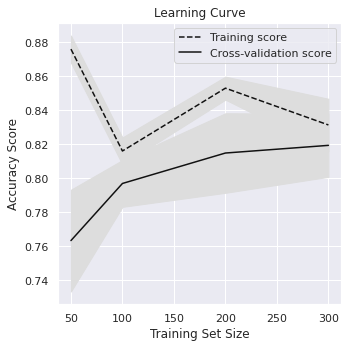

confusion matrix [[165  16]
 [ 35  87]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.87       181
           1       0.84      0.71      0.77       122

    accuracy                           0.83       303
   macro avg       0.83      0.81      0.82       303
weighted avg       0.83      0.83      0.83       303



In [28]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print("train score",gnb.score(train_x, traindf["Survived"]))
print("test score",gnb.score(X_valid,y_valid))
print(gnb.get_params())

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("train score",knn.score(train_x, traindf["Survived"]))
print("test score",knn.score(X_valid,y_valid))
print(knn.get_params())

svm = SVC(probability=True)
svm.fit(X_train,y_train)
print("train score",svm.score(train_x, traindf["Survived"]))
print("test score",svm.score(X_valid,y_valid))
print(svm.get_params())
print("-------------------------------------------------------")
lr = LogisticRegression()
lr.fit(X_train,y_train)
print("train score",lr.score(train_x, traindf["Survived"]))
print("test score",lr.score(X_valid,y_valid))
print(lr.get_params())
print("-------------------------------------------------------")
mlp = MLPClassifier(solver='lbfgs',random_state=1)
mlp.fit(X_train,y_train)
print("train score",mlp.score(train_x, traindf["Survived"]))
print("test score",mlp.score(X_valid,y_valid))
print(mlp.get_params())
print("-------------------------------------------------------")
v_clf = VotingClassifier(estimators=[('NB',gnb),('SVM',svm),('KNN',knn),('LR',lr),('MLP',mlp)],voting='soft')
v_clf.fit(X_train,y_train)
print("train score",v_clf.score(train_x, traindf["Survived"]))
print("test score",v_clf.score(X_valid,y_valid))

#plot training and validation scores for different training sizes
plot_graph(v_clf,train_x, traindf["Survived"])

y_pred=v_clf.predict(X_valid)
print("confusion matrix",confusion_matrix(y_valid,y_pred))
print(classification_report(y_valid,y_pred))

AdaBoost

train score 0.8215488215488216
test score 0.8151815181518152
AdaBoostClassifier(n_estimators=10, random_state=0)


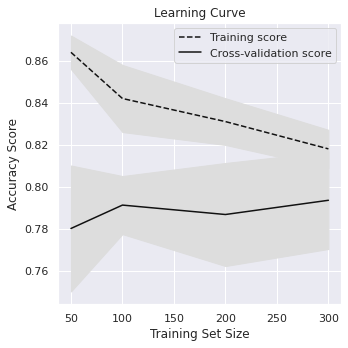

confusion matrix [[157  24]
 [ 32  90]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       181
           1       0.79      0.74      0.76       122

    accuracy                           0.82       303
   macro avg       0.81      0.80      0.81       303
weighted avg       0.81      0.82      0.81       303



In [29]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(random_state=0)
param_values = {'n_estimators':[3,5,10,20,30,50]}  
GS_adaboost = GridSearchCV(ada_boost, param_grid=param_values)
GS_adaboost.fit(X_train, y_train)
print("train score",GS_adaboost.score(train_x, traindf["Survived"]))
print("test score",GS_adaboost.score(X_valid,y_valid))
print(GS_adaboost.best_estimator_)

#plot training and validation scores for different training sizes
plot_graph(GS_adaboost.best_estimator_,train_x, traindf["Survived"])

y_pred=GS_adaboost.predict(X_valid)
print("confusion matrix",confusion_matrix(y_valid,y_pred))
print(classification_report(y_valid,y_pred))

# Model testing

In [30]:
#test data classification using Voting classifier
v_clf.fit(train_x, traindf["Survived"])
ytest_pred1 = v_clf.predict(test_x)
ytest_pred1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
#test data classification using adaboost classifier
GS_adaboost.fit(train_x, traindf["Survived"])
ytest_pred2 = GS_adaboost.predict(test_x)
ytest_pred2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [32]:
ytest_pred1==ytest_pred2

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [33]:

submission=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission["Survived"]=ytest_pred1
submission["PassengerId"]=testdf["PassengerId"]
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


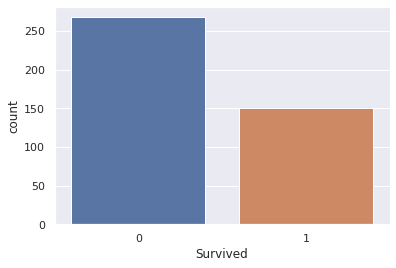

In [34]:
sns.countplot(submission["Survived"])

In [35]:
submission.to_csv('gender_submission.csv',index=False)